In [1]:
# Import Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('source_data/lumab_5c.csv')
df.head()

,TIMEPOINT,NAME,ENTRY,CONDITION,PRODUCT,Sample-Number,Lot
0,6,Deamidation,3.67,5C,Lumab,21573,39360
1,9,Deamidation,3.46,5C,Lumab,21575,39360
2,12,Deamidation,4.51,5C,Lumab,21578,39360
3,24,Deamidation,3.83,5C,Lumab,95206,39404
4,24,Deamidation,4.19,5C,Lumab,95209,39408


In [5]:
# Establish the bins 
entry_bins = [0, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3]
group_names = ["1.3", "2.3", "3.3", "4.3", "5.3", "6.3", "7.3"]

# Categorize the deamidiation measurement using entry_bins
df["entry_range"] = pd.cut(df["ENTRY"], entry_bins, labels=group_names)

df.head()

,TIMEPOINT,NAME,ENTRY,CONDITION,PRODUCT,Sample-Number,Lot,entry_range
0,6,Deamidation,3.67,5C,Lumab,21573,39360,4.3
1,9,Deamidation,3.46,5C,Lumab,21575,39360,4.3
2,12,Deamidation,4.51,5C,Lumab,21578,39360,5.3
3,24,Deamidation,3.83,5C,Lumab,95206,39404,4.3
4,24,Deamidation,4.19,5C,Lumab,95209,39408,4.3


In [6]:
# correlation test of the dataset
test=df.corr()

In [7]:
test

,TIMEPOINT,ENTRY,Sample-Number
TIMEPOINT,1.000000,0.649256,0.163828
ENTRY,0.649256,1.000000,0.062970
Sample-Number,0.163828,0.062970,1.000000


In [8]:
import seaborn as sns

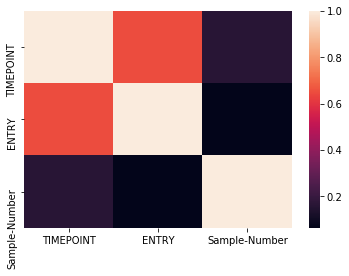

In [9]:
sns.heatmap(test)
# Save Figure
plt.savefig("images/heat_map.png")

In [10]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = df.TIMEPOINT.values.reshape(-1, 1)
y = df.ENTRY.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (210, 1) (210, 1)


array([[ 6],
       [ 9],
       [12],
       [24],
       [24],
       [ 5],
       [38],
       [31],
       [31],
       [ 9],
       [36],
       [18],
       [38],
       [38],
       [38],
       [30],
       [36],
       [36],
       [ 9],
       [ 9],
       [30],
       [30],
       [30],
       [ 6],
       [ 3],
       [ 6],
       [ 6],
       [24],
       [12],
       [12],
       [24],
       [12],
       [24],
       [24],
       [24],
       [ 9],
       [12],
       [ 0],
       [ 0],
       [24],
       [30],
       [36],
       [ 0],
       [ 1],
       [ 3],
       [ 6],
       [ 9],
       [12],
       [18],
       [24],
       [30],
       [36],
       [ 0],
       [30],
       [18],
       [32],
       [32],
       [ 9],
       [12],
       [ 4],
       [ 0],
       [ 1],
       [ 3],
       [ 6],
       [ 9],
       [12],
       [18],
       [24],
       [30],
       [36],
       [ 0],
       [ 1],
       [ 3],
       [ 6],
       [ 9],
       [12],
       [18],

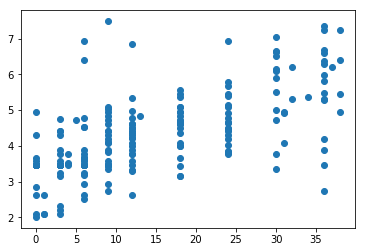

In [11]:
# Plot the data

plt.scatter(X, y)

In [12]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [14]:
# Fit the model to train the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.06183199]]
y-axis intercept:  [3.40395837]


In [16]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0]]
Max X Value: [[38]]


In [17]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

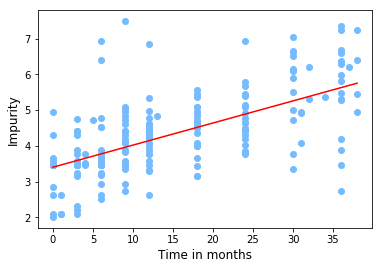

In [18]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='xkcd:sky blue')

plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel('Time in months', fontsize='large')
plt.ylabel('Impurity', fontsize='large');

# Save Figure
plt.savefig("images/linear.png")

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.7550743435980509
R-squared (R2 ): 0.42091002349567175


In [20]:
# Overall Score for the model
model.score(X, y)

0.42091002349567175